In [1]:
from IPython.display import IFrame

# Resolviendo problemas de álgebra y cálculo usando programación

## Presentación

El tema de la presentación de hoy es el uso de la librería Sympy (https://www.sympy.org/) en combinación 
con los diccionarios (un tipo de estructura de datos de Python) para resolver problemas de álgebra y
cálculo.

## Temario

- Sympy - la libería de álgebra simbólica de Python.
- ¿$x=x$? Variables, expresiones y simbolos.
- Pongamos todo junto: usando diccionarios.
- ¿Porqué resolver un problema, si podemos resolver 10?

## Sympy - la libería de álgebra simbólica de Python

> SymPy es una biblioteca de Python para matemáticas simbólicas. 
> Su propósito es llegar a ser un sistema de álgebra por computadora (CAS) 
> completo manteniendo el código tan simple como sea posible para poder ser 
> legible y extensible de manera fácil. SymPy está escrito en Python enteramente. 
>
> -- <cite>https://www.sympy.org/en/index.html</cite>

In [2]:
IFrame('http://www.sympy.org/es/', width=1000, height=500)

¿Cómo podemos acceder a esta magia desde Python?...

In [3]:
# Aquí vamos!!
import sympy as sp

__Nota:__ El `sp` es simplemente un _alias_ o modo alternativo para llamar a la librería, evitando escribir `sympy` cada vez. 

Pero esperen... hay algo que es importante decir:
__SymPy__ puede utilizar diferentes herramientas para dar la mejor presentación.

![Latex](Imagenes/Latex.png)

Si __miketex__ (disponible en anaconda) está instalado permite una representación basada en __LaTeX__ (https://www.latex-project.org/). Esta representación está disponible automáticamente en Jupyter, pero para poder aprovechar esta representación en otros sitemas (por ejemplo Spyder) es necesario importar:

In [4]:
from IPython.display import display as pp # pretty print

![Spyder](Imagenes/Spyder.png)

Bueno, continuemos.
El primer paso es declarar los simbolos que utilizaremos. SymPy reconoce automáticamente la escritura de simbolos de LaTeX:

In [5]:
x = sp.Symbol('x')
Pc = sp.Symbol('P_{c}')
pp( x, Pc )

x

P_{c}

Estos símbolos son ahora símbolos algebraicos con los que podemos trabajar junto con numeros y armar expresiones.

In [6]:
f = 5 * x**2 + Pc * x + 6
pp( f )

P_{c}*x + 5*x**2 + 6

## ¿$x=x$? Variables, expresiones y simbolos.

¿Cómo es eso de que $x = x$?

`x = sp.Symbol('x')`

Lo que realmente es importante entender que lo que está a la __derecha__ es un _símbolo_ algebraico, 
mientras que lo que está a la __izquierda__ es una _variable_ de Python.

En Python __todo__ es un __objeto__ y aunque no me quiero meter a este tema 
(y no porque no sea interesante, sino porque nos podría tomar mucho más tiempo)
podemos afirmar que _la variable_ `x` contiene _el símbolo_ $x$.

Así, podemos hacer, por ejemplo:

In [7]:
y = x * x * x
pp( y )

x**3

Aunque aquí, en realidad, `y` contiene una _expresión algebraica_ (que, al igual que los _símbolo_ `x` es un _objeto_ de __sympy__).

Es decir:

![Fig3](Imagenes/TutSympy.png)

Nada nos impide hacer cosas que pudieran no tener mucho sentido:

In [8]:
a = sp.Symbol('b')
b = sp.Symbol('a')
pp( a,b )

b

a

Pero, cómo sabemos, _con un gran poder viene una grán responsabilidad_ por lo que estoy seguro que no harán este tipo de cosas ;).

In [9]:
a = sp.Symbol('a')
b = sp.Symbol('b')
pp( a,b )

a

b

### Álgebra

Una vez que hemos declarado algunos símbolos podemos manipularlos con diferentes __expresiones algebráicas__:
- Sumas, restas, multiplicaciones y divisiones con otros símbolos o con números enteros y reales:

In [10]:
pp( 4*x/(2*x-1) + 1.26432*x )

1.26432*x + 4*x/(2*x - 1)

- Potencias y racies:

In [11]:
pp( x**2 - sp.sqrt(Pc) + sp.root(x,3) )

-sqrt(P_{c}) + x**(1/3) + x**2

- Funciones trigonométricas:

In [12]:
pp( Pc * sp.cos(x) - sp.atan(1-x) )

P_{c}*cos(x) + atan(x - 1)

- Fracciones

In [13]:
pp( sp.Rational(1,2) + sp.Rational(1,4) )

3/4

### Substituciones de valores o variables:

Para substituir se puede usar el método `subs(variable,valor)`

In [14]:
pp( (x+x**2).subs(x,5) ) # 5+5x5 = 30

30

(Los paréntesis nos permiten que la expresión sea formada antes de levar a cabo substitución).

Las substituciones pueden ocurrir una después de la otra, o usando un diccionario:

In [15]:
pp( (x**a).subs(x,4).subs(a,2) ) # 4²

16

In [16]:
(x**a).subs({x:4, a:2}) # 4²

16

### Simplificaciones, factorizaciones y expansiones

Declaramos una función polinomial para los siguientes comandos:

In [17]:
z = x**3 + 4*x**2 + 2*x**3 + x
pp(z)

3*x**3 + 4*x**2 + x

El método `simplify` intentará obtener una expresión más sencilla:

In [18]:
pp( sp.simplify(z) )

x*(3*x**2 + 4*x + 1)

__Nota__: estas funciones se pueden utilizar llamándolas como métodos de las __expresiones__ algebraicas:

In [19]:
pp( z.simplify() )

x*(3*x**2 + 4*x + 1)

In [20]:
pp( (sp.sin(x)**2 + sp.cos(x)**2).simplify() ) # (sen(x))² + (cos(x))² = 1

1

El método `factor` intentará factorizar la expresión:

In [21]:
pp( z.factor() )

x*(x + 1)*(3*x + 1)

Por otro lado, el método `expand` aplicará la propiedad distributiva, expandiendo la expresión:

In [22]:
pp( z.expand() )

3*x**3 + 4*x**2 + x

### Derivación e integración

Se pueden derivar expresiones usando el método `diff`:

In [23]:
pp( z.diff(x) )

9*x**2 + 8*x + 1

In [24]:
pp( sp.sin(sp.pi*x).diff(x) )

pi*cos(pi*x)

Para integrar se utiliza el método `integrate`. Si se usa simplemente la variable la integral será indefinida:

In [25]:
pp( z.integrate(x) )

3*x**4/4 + 4*x**3/3 + x**2/2

In [26]:
pp( sp.sin(sp.pi*x).integrate(x) )

-cos(pi*x)/pi

Para integrales definidas se incluye la variable y los límites en una tupla `(variable, inferior, superior)`:

In [27]:
pp( z.integrate((x,0,1)) )

31/12

In [28]:
pp( sp.sin(sp.pi*x).integrate((x,0,1)) )

2/pi

### Vectores y matrices

Para declarar un vector o una matriz se utiliza la función `matrix` y una lista de listas:

In [29]:
m1 = sp.Matrix([[1,2],
                [3,4],
                [5,6]])
pp( m1 )

Matrix([
[1, 2],
[3, 4],
[5, 6]])

In [30]:
v1 = sp.Matrix([6,5])
pp( v1 )

Matrix([
[6],
[5]])

In [31]:
v2 = sp.Matrix([3,2,1])
pp( v2 )

Matrix([
[3],
[2],
[1]])

Las multiplicaciones de matrices se obtienen utilizando simplemente el operador `*` (siempre y cuando se cumplan las reglas de dichas operaciones):

In [32]:
pp( m1 * v1 )

Matrix([
[16],
[38],
[60]])

Para transponer cualquier vector o matriz se utiliza `.T`:

In [33]:
pp( v2.T )

Matrix([[3, 2, 1]])

In [34]:
pp( v2.T * m1 )

Matrix([[14, 20]])

Para accesar los elementos, renglones o columnas de una matriz se utilizan los corchetes después de la expresión `[renglon, columna]`, con los dos puntos `:` para una línea o renglón completo (recordar que en __Python__ los subíndices siempre inician de cero):

In [35]:
pp( m1[0,1] ) # Elemento 0 de la columna 1

2

In [36]:
pp( m1[:,0] ) # Toda la columna 0

Matrix([
[1],
[3],
[5]])

In [37]:
pp( m1[2,:]  )# Todo el renglón 2

Matrix([[5, 6]])

Para un vector podemos usar un sólo índice (`[número]`):

In [38]:
pp( v1[0] )

6

Es importante hacer notar que para __Sympy__ no es igual una matriz 1x1 que un número, de tal manera que:

In [39]:
pp( v2.T * v2 )

Matrix([[14]])

Si queremos utilizar este valor como un número debemos extraerlo, utilizando su posición (`[0]` o `[0,0]`):

In [40]:
pp( (v2.T * v2)[0,0] + 5  )

19

In [41]:
pp( (v2.T * v2)[0,0] * v1  )

Matrix([
[84],
[70]])

En el caso de dos vectores podemos usar la operación punto:

In [42]:
pp( v2.dot(v2) )

14

Puede ser útil también el cálculo del determinante.

In [43]:
m2 = sp.Matrix([[1,2,3],
                [2,3,1],
                [4,4,1]])

pp( m2.det() )

-9

### Combinando lo anterior

Todo lo anterior se puede usar en conjunto:

In [44]:
pp( (a * sp.Matrix([[x,    x**2 ],
                [x**3, x**-1]])).integrate((x,0,1)).subs(a,2) )

Matrix([
[  1, 2/3],
[1/2,  oo]])

### Gráficas de funciones

Para graficar podemos usar `sp.plotting.plot`:

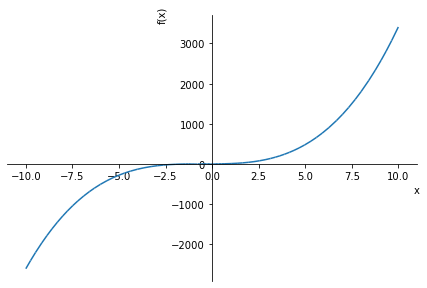

In [45]:
sp.plotting.plot(z);

Si queremos definir límites de la función se utiliza la misma notación que la integración. Por otro lado, si queremos definir los límites de la gráfica, se usan las palbras `xlim=` y `ylim=`, seguidos de los valores `[inferior, superior]`:

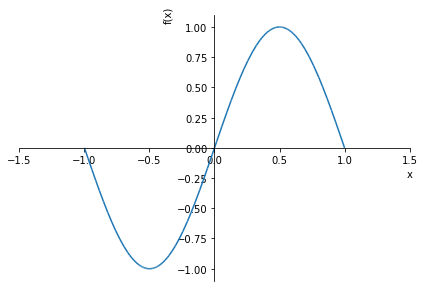

In [46]:
sp.plotting.plot(sp.sin(sp.pi*x), (x,-1,1), xlim=[-1.5, 1.5]);

Esta función tiene otras opciones, pero no se explorarán aqui.

### Solución de ecuaciones

Suponiendo que tengamos una ecuación del tipo:

$$x^2 + 2*x = 5$$

Sympy buscará algebraicamente las soluciones usando el comando `sp.solve()`. Es necesario _igualar la expresión a cero_:

$$x^2 + 2*x - 5 = 0$$

In [47]:
expr = x**2 + 2*x - 3

pp( sp.solve(expr) )

[-3, 1]

Sistemas de ecuaciones pueden ser contenidos en una matriz (ya sea directamente o por una multiplicación) y resueltos con el mismo comando. Por ejemplo, un sistema $Mx=b$:

In [48]:
x1, x2 = sp.symbols('x_1, x_2')

x = sp.Matrix([x1, x2])
M = sp.Matrix([[1,2],[3,-2]])
b = sp.Matrix([8,16])

expr = M * x - b
pp( expr )

Matrix([
[   x_1 + 2*x_2 - 8],
[3*x_1 - 2*x_2 - 16]])

In [49]:
sp.solve(expr)

{x_1: 6, x_2: 1}

## Pongamos todo junto: usando diccionarios

Los _diccionarios_ en __Python__ son estructuras de datos propias del lenguaje en cierta forma similares a las _tuplas_ y a los _listas_ con una diferencia: en las _tuplas_ y _listas_ los elementos se encuentran asociados cada uno a un entero que forma una secuencia, mientras que en los diccionarios es posible asociar a los elementos a cualquier objeto.

Así, en una _lista_ (por ejemplo) tenemos:

    dirección -> objeto
       0      ->   'a'
       1      ->   'b'
       2      ->   'c'
           ........

En un _diccionario_ podemos tener, por ejemplo:

       key          ->   value
       'pais'       ->   'Argentina'
       'provincia'  ->   'Salta'
       'longitud'   ->   -65.410556
       'latitud'    ->   -24.788333

Así el diccionario nos permite guardar informaciones __complejas__ o __relacionadas__.

El ejemplo anterior se declara como diccionario usando las `{}` y separando cada _value_ de su _key_ utilizando `:`. Es decir:

In [50]:
Salta = {'pais':'Argentina',
         'provincia':'Salta',
         'longitud':-65.410556,
         'latitud':-24.788333}

Siempre y cuando estemos dentro de las llaves (`{}`) y fuera de los apostrofes (`'`) podemos incluir nuevas líneas para mejorar la legibilidad.

__Resolvamos un problema__:

Para explorar como se puede aplicar un diccionario a la solución de un problema, tomemos por ejemplo el siguiente problema:

Un automóvil parte de Salta hacia Asunción a las 12:00 horas. A las 14:00, otro sale de Asunción hacia Salta. Los automóviles llevan velocidades de 100 km/h y 50 km/h respectivamente. Sabiendo que la distancia que separa Salta de Asunción es de 1100 km, calcular:

1. ¿A qué distancia de Salta se cruzan?
2. ¿A qué distancia de Asunción se cruzan?
3. ¿A qué hora se cruzan?

Declaramos los _símbolos_ que utilizaremos:

In [66]:
t = sp.Symbol('t') # tiempo que tardan en encontrarse
d = sp.Symbol('d') # distancia de encuentro
hsal1 = sp.Symbol('hsal_1') # hora de salida 1
hsal2 = sp.Symbol('hsal_2') # hora de salida 2                  
v1 = sp.Symbol('v_1') # velocidad 1                  
v2 = sp.Symbol('v_2') # velocidad 2
henc = sp.Symbol('henc') # hora a la que se encuentran

Sabemos que la distancia recorrida es igual a la integral de la velocidad con respecto al tiempo, usando como límites la hora de inicio y la hora de final del movimiento:

$$distancia = \int_{hsal_1}^{henc} v_1 dt$$

Para obtener el tiempo que tardan en encontrarse podemos usar la ecuación:

$$\int_{hsal_1}^{henc} v_1 dt + \int_{hsal_2}^{henc} v_2 dt  = d$$

In [52]:
eq = sp.integrate(v1, (t, hsal1, henc)) + sp.integrate(v2, (t, hsal2, henc)) - d
pp(eq)

-d + henc*v_1 + henc*v_2 - hsal_1*v_1 - hsal_2*v_2

Los datos del problema se pueden poner en un diccionario:

In [67]:
P1 =  {d:1100, hsal1:12.0, hsal2:14.0, v1:100, v2:50}
pp( sp.solve(eq.subs(P1)) )

[20.0000000000000]

__Nota__: El comando `solve` automáticamente detecta que nuestra única incognita es la `henc` y nos regresa una lista, ya que podría haber varias soluciones.

Las preguntas 1 y 2 se pueden contestar usando este valor en ambas integrales.

In [55]:
sp.integrate(v1, (t, hsal1, henc)).subs(P1).subs(henc,20)

800.000000000000

In [56]:
sp.integrate(v2, (t, hsal2, henc)).subs(P1).subs(henc,20)

300.000000000000

Comandante Fontana

![Comandante Fontana](Imagenes/ComandanteFontana.png)

__Fuente__: Google Maps 

## ¿Porqué resolver un problema, si podemos resolver 10?

Una vez que hemos hecho lo anterior es fácil resolver el problema si los datos cambian.

Si ahora el segundo automóviles no salió de Asunción, sino de Buenos Aires:

In [57]:
P2 =  {d:1500, hsal1:12.0, hsal2:14.0, v1:100, v2:50}
print('Hora de encuentro:')
pp( sp.solve(eq.subs(P2)) )

Hora de encuentro:


[22.6666666666667]

Si la velocidad del primer automóvil baja a 90 km/h.

In [58]:
P3 =  {d:1100, hsal1:12.0, hsal2:14.0, v1:90, v2:50}
print('Hora de encuentro:')
pp( sp.solve(eq.subs(P3)) )

Hora de encuentro:


[20.5714285714286]

Si el primer automóvil se retrasó y salió hasta las 5pm:

In [59]:
P4 =  {d:1100, hsal1:17.0, hsal2:14.0, v1:100, v2:50}
print('Hora de encuentro:')
pp( sp.solve(eq.subs(P4)) )

Hora de encuentro:


[23.3333333333333]

Si el que sale de Asunción no es un automóvil, sino un avión:

In [60]:
P5 =  {d:1100, hsal1:12.0, hsal2:14.0, v1:100, v2:250}
print('Hora de encuentro:')
pp( sp.solve(eq.subs(P5)) )

Hora de encuentro:


[16.5714285714286]

Pero bueno, al final ahí estamos más o menos con el mismo problema, imaginen que ahora ignoramos la velocidad del primer automóvil, pero sabemos que se encontraron a las 21:30.

In [61]:
P6 =  {d:1100, hsal1:12.0, hsal2:14.0, v2:50, henc:21.5}
print('Velocidad del automóvil que salió de Salta:')
pp( sp.solve(eq.subs(P6)) )

Velocidad del automóvil que salió de Salta:


[76.3157894736842]

A las 22:15.

In [62]:
P7 =  {d:1100, hsal1:12.0, hsal2:14.0, v2:50, henc:22.25}
print('Velocidad del automóvil que salió de Salta:')
pp( sp.solve(eq.subs(P7)) )

Velocidad del automóvil que salió de Salta:


[67.0731707317073]

Si conocemos la velocidad y la hora a la que se encontraron, pero no la hora a la que salió de Salta.

In [63]:
P8 =  {d:1100, hsal2:14.0, v1:100, v2:50, henc:19.5}
print('Hora de salida del automóvil que salió de Salta:')
pp( sp.solve(eq.subs(P8)) )

Hora de salida del automóvil que salió de Salta:


[11.2500000000000]

Incluso, podríamos saber que el automóvil de asunción salió 30 minutos después (si se encontraron a las 20hrs).

In [64]:
P9 =  {d:1100, hsal2:hsal1+0.5, v1:100, v2:50, henc:20.0}
print('Hora de salida del automóvil que salió de Salta:')
pp( sp.solve(eq.subs(P9)) )

Hora de salida del automóvil que salió de Salta:


[12.5000000000000]

O que el automóvil de Asunción viajaba 20 km/h más rápido que el de Salta (nuevamente encontrandose a las 20hrs).

In [65]:
P10 =  {d:1100, hsal1:12.0, hsal2:14.0, v2:v1+20, henc:20}
print('Velocidad automóvil que salió de Salta:')
pp( sp.solve(eq.subs(P10)) )

Velocidad automóvil que salió de Salta:


[70.0000000000000]